<a href="https://colab.research.google.com/github/shubhammane7777/Comparing-Algorithms-for-Credit-Risk-Prediction-/blob/main/Comparison_of_algorithms_of_credit_risk_for_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = '/content/drive/MyDrive/lending_club_small.csv'
df = pd.read_csv(file_path, low_memory=False)

# Basic info
print("Shape of data:", df.shape)
df.head()


Shape of data: (40000, 144)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,7000.0,7000.0,7000.0,36 months,13.35,237.04,C,C2,9 years,RENT,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,6000.0,6000.0,6000.0,36 months,15.31,208.91,C,C2,NaN,OWN,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,14400.0,14400.0,14400.0,36 months,16.99,513.33,D,D1,1 year,RENT,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,12775.0,12775.0,12775.0,60 months,14.33,299.45,C,C2,2 years,OWN,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,9100.0,9100.0,9100.0,36 months,12.12,302.78,B,B3,3 years,RENT,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# Drop columns with more than 50% missing values
null_percent = df.isnull().mean() * 100
cols_to_drop = null_percent[null_percent > 50].index
df.drop(columns=cols_to_drop, inplace=True)

print("Dropped columns with >50% missing values:", list(cols_to_drop))

# Drop irrelevant columns
irrelevant = ['id', 'member_id', 'url', 'desc', 'emp_title', 'title', 'zip_code']
df.drop(columns=[col for col in irrelevant if col in df.columns], inplace=True)


print("Shape of data:", df.shape)

Dropped columns with >50% missing values: ['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardshi

In [94]:
print("Shape of data:", df.shape)
df.head()

Shape of data: (40000, 89)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,7000.0,7000.0,7000.0,36 months,13.35,237.04,C,C2,9 years,RENT,...,33.3,0.0,0.0,78425.0,57438.0,21100.0,41625.0,N,Cash,N
1,6000.0,6000.0,6000.0,36 months,15.31,208.91,C,C2,NaN,OWN,...,63.6,0.0,0.0,17700.0,14709.0,16900.0,0.0,N,Cash,N
2,14400.0,14400.0,14400.0,36 months,16.99,513.33,D,D1,1 year,RENT,...,0.0,0.0,0.0,54012.0,45503.0,2300.0,44912.0,N,Cash,N
3,12775.0,12775.0,12775.0,60 months,14.33,299.45,C,C2,2 years,OWN,...,50.0,0.0,0.0,173310.0,19845.0,20800.0,11271.0,N,Cash,N
4,9100.0,9100.0,9100.0,36 months,12.12,302.78,B,B3,3 years,RENT,...,0.0,0.0,0.0,83168.0,53257.0,15800.0,58668.0,N,Cash,N


In [95]:
# Drop columns with more than 50% missing values
null_percent = df.isnull().mean() * 100
cols_to_drop = null_percent[null_percent > 50].index
df.drop(columns=cols_to_drop, inplace=True)

print("Dropped columns with >50% missing values:", list(cols_to_drop))

# Drop irrelevant columns
irrelevant = ['id', 'member_id', 'url', 'desc', 'emp_title', 'title', 'zip_code']
df.drop(columns=[col for col in irrelevant if col in df.columns], inplace=True)

# Strip and extract the numeric part from 'term' column
df['term'] = df['term'].str.extract('(\d+)').astype(float)



Dropped columns with >50% missing values: []


In [102]:
# Step 1: Check which columns are categorical
cat_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", cat_cols.tolist())

Categorical columns: ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']


In [103]:
# Step 2: Drop all categorical columns
df_numeric = df.drop(columns=cat_cols)

In [104]:
# Optional: Check remaining columns
print("Remaining numeric columns:", df_numeric.columns.tolist())

Remaining numeric columns: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', '

In [106]:
# Now drop remaining categorical columns
cat_cols = df.select_dtypes(include='object').columns
df_numeric = df.drop(columns=cat_cols)

# Confirm
print("Remaining columns after drop:", df_numeric.columns.tolist())


Remaining columns after drop: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl'

In [108]:
df_numeric.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,7000.0,7000.0,7000.0,36.0,13.35,237.04,42000.0,1,13.60,2.0,...,0.0,1.0,71.0,33.3,0.0,0.0,78425.0,57438.0,21100.0,41625.0
1,6000.0,6000.0,6000.0,36.0,15.31,208.91,47000.0,0,13.66,0.0,...,0.0,1.0,100.0,63.6,0.0,0.0,17700.0,14709.0,16900.0,0.0
2,14400.0,14400.0,14400.0,36.0,16.99,513.33,36000.0,1,28.57,0.0,...,0.0,1.0,100.0,0.0,0.0,0.0,54012.0,45503.0,2300.0,44912.0
3,12775.0,12775.0,12775.0,60.0,14.33,299.45,40000.0,0,19.68,0.0,...,0.0,1.0,100.0,50.0,0.0,0.0,173310.0,19845.0,20800.0,11271.0
4,9100.0,9100.0,9100.0,36.0,12.12,302.78,45000.0,1,29.25,1.0,...,1.0,1.0,95.0,0.0,0.0,0.0,83168.0,53257.0,15800.0,58668.0


In [111]:
X = df_numeric.drop('loan_status', axis=1)
y =df_numeric['loan_status']


Feature Selection Plan

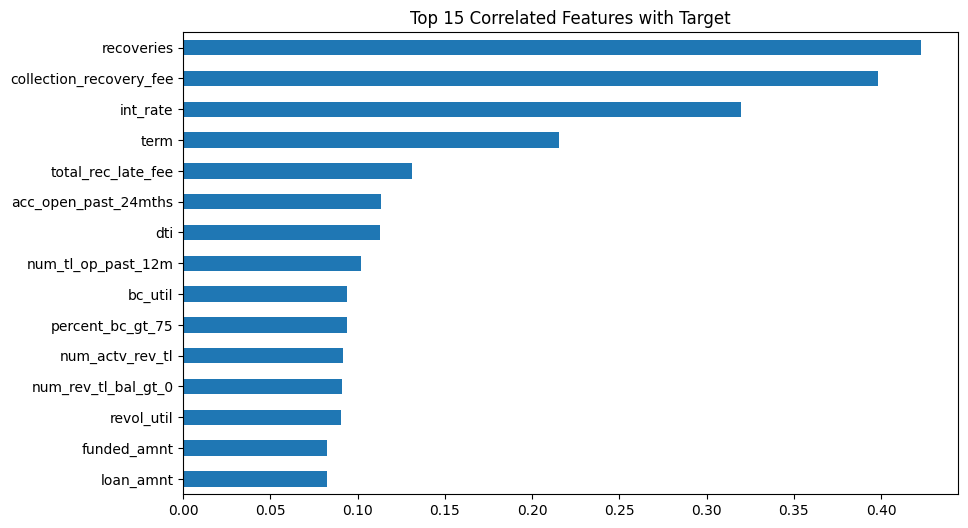

In [112]:
import matplotlib.pyplot as plt

# Combine X and y temporarily
data = X.copy()
data['loan_status'] = y

# Compute correlations
correlations = data.corr()['loan_status'].sort_values(ascending=False)

# Plot top correlated features
plt.figure(figsize=(10, 6))
correlations.drop('loan_status').head(15).plot(kind='barh')
plt.title("Top 15 Correlated Features with Target")
plt.gca().invert_yaxis()
plt.show()


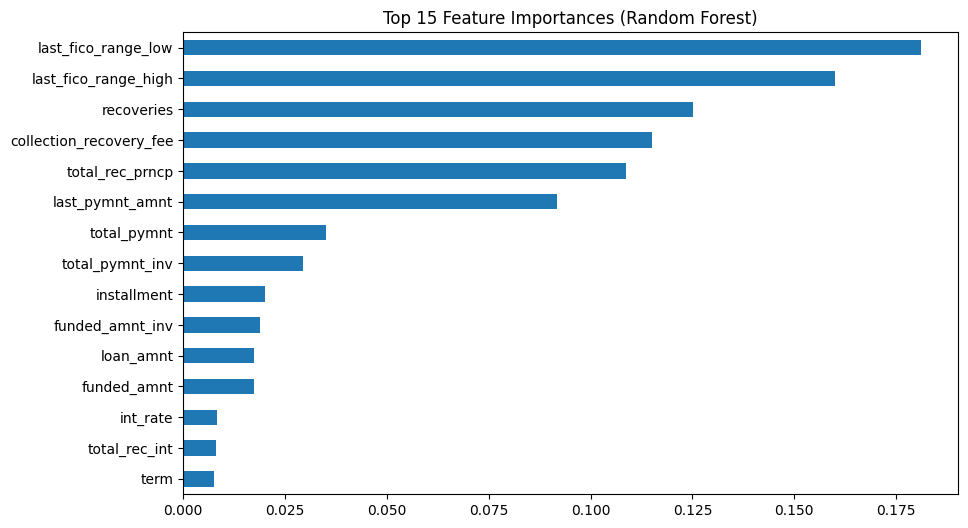

In [114]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot top 15
importances.head(15).plot(kind='barh', figsize=(10, 6), title='Top 15 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.show()
